In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_bmyrc_tfidf.csv")

In [3]:
df_knn

,index,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Beta-Myrcene
0,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0.484375
1,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0.484375
2,3,0.0,0.0,0.0,0.0,0.0,0.145484,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0.484375
3,3,0.0,0.0,0.0,0.0,0.0,0.145484,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0.484375
4,5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0.484375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42973,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.273438
74996,42974,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.273438
74997,42975,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.273438
74998,42975,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.273438


Splitting dependent and independent variables

In [4]:
X = df_knn.drop(['X..Beta-Myrcene', 'index'], axis = 1)
y = df_knn[['X..Beta-Myrcene']]

Plotting histograms on target variable

In [5]:
y_array = y.to_numpy()
y_array

array([[0.484375 ],
       [0.484375 ],
       [0.484375 ],
       ...,
       [0.2734375],
       [0.2734375],
       [0.2734375]])

<AxesSubplot:ylabel='Count'>

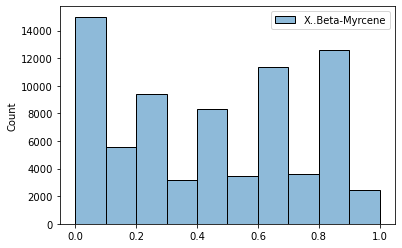

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [10]:
mean_absolute_error(y_val, y_pred_knreg)

0.10096812386167074

In [11]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8120862258618391

In [12]:
#val
r2_score(y_val, y_pred_knreg)

0.6705674973580646

Feature Selection

In [13]:
rfreg = RandomForestRegressor()

In [14]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [15]:
selector.estimator_.feature_importances_

array([1.15093485e-03, 1.67402985e-03, 6.58675313e-04, 4.39040053e-04,
       1.03287849e-03, 2.52202461e-03, 1.24474685e-03, 4.60547309e-03,
       1.43844804e-03, 1.60960736e-03, 7.27155386e-04, 4.14391715e-03,
       3.96372648e-04, 2.65210377e-04, 1.06071301e-03, 1.04884614e-03,
       4.04513175e-03, 1.38891764e-03, 3.77375892e-04, 1.27874349e-03,
       2.63451115e-03, 2.19553218e-03, 1.09944501e-03, 2.17646012e-04,
       8.49202409e-04, 1.40827879e-03, 1.16264301e-03, 6.04845918e-04,
       1.22163306e-03, 6.26921981e-04, 3.76041041e-03, 5.80705582e-04,
       1.79340736e-03, 4.31391304e-04, 4.97598592e-03, 5.50286721e-04,
       2.93081833e-04, 4.29640129e-03, 3.27821937e-04, 1.39378626e-03,
       6.48501613e-04, 1.32439929e-03, 3.68094800e-04, 6.44668922e-03,
       1.18562436e-03, 1.13981932e-03, 3.30718335e-03, 3.04938427e-04,
       1.59882563e-03, 4.84440178e-04, 8.77337699e-04, 2.35799388e-04,
       5.18743917e-04, 1.79592004e-03, 1.79210880e-03, 2.41793593e-03,
      

In [16]:
selector.threshold_

0.0021321961620469083

In [17]:
mask = selector.get_support()

In [18]:
mask

array([False, False, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False,  True,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True, False,

In [19]:
selected_features = X.columns[mask]

In [20]:
selected_X = df_knn[selected_features]
selected_X

,tfidf_5,tfidf_7,tfidf_11,tfidf_16,tfidf_20,tfidf_21,tfidf_30,tfidf_34,tfidf_37,tfidf_43,...,diesel,earthy,grape,lemon,mint,orange,pine,sage,sweet,woody
0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.145484,0.0,0.00000,0.0,0.0,0.0,0.0,0.15591,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0
3,0.145484,0.0,0.00000,0.0,0.0,0.0,0.0,0.15591,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0
4,0.000000,0.0,0.11584,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
74996,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
74997,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
74998,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
selected_X.columns.to_list()

['tfidf_5',
 'tfidf_7',
 'tfidf_11',
 'tfidf_16',
 'tfidf_20',
 'tfidf_21',
 'tfidf_30',
 'tfidf_34',
 'tfidf_37',
 'tfidf_43',
 'tfidf_46',
 'tfidf_55',
 'tfidf_61',
 'tfidf_65',
 'tfidf_67',
 'tfidf_73',
 'tfidf_78',
 'tfidf_90',
 'tfidf_93',
 'tfidf_98',
 'tfidf_101',
 'tfidf_103',
 'tfidf_119',
 'tfidf_121',
 'tfidf_122',
 'tfidf_126',
 'tfidf_128',
 'tfidf_130',
 'tfidf_136',
 'tfidf_141',
 'tfidf_144',
 'tfidf_145',
 'tfidf_149',
 'tfidf_151',
 'tfidf_158',
 'tfidf_162',
 'tfidf_163',
 'tfidf_164',
 'tfidf_166',
 'tfidf_167',
 'tfidf_168',
 'tfidf_173',
 'tfidf_174',
 'tfidf_178',
 'tfidf_181',
 'tfidf_184',
 'tfidf_187',
 'tfidf_189',
 'tfidf_190',
 'tfidf_194',
 'tfidf_199',
 'tfidf_200',
 'tfidf_205',
 'tfidf_207',
 'tfidf_210',
 'tfidf_215',
 'tfidf_221',
 'tfidf_230',
 'tfidf_239',
 'tfidf_240',
 'tfidf_243',
 'tfidf_245',
 'tfidf_253',
 'tfidf_257',
 'tfidf_258',
 'tfidf_264',
 'tfidf_267',
 'tfidf_272',
 'tfidf_273',
 'tfidf_281',
 'tfidf_283',
 'tfidf_285',
 'tfidf_303',


In [22]:
import joblib

joblib.dump(selected_X, "selected_X_knn_tfidf_bmyrc.pkl")
joblib.dump(selector, "selector_knn_tfidf_bmyrc.pkl")

['selector_knn_tfidf_bmyrc.pkl']

Train test split (after Feature Selection)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [24]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [25]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [26]:
mean_absolute_error(y_val, y_pred_knreg)

0.09769482557011855

In [27]:
mean_squared_error(y_val, y_pred_knreg)

0.026316334605145954

In [28]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.16222310133006937

In [29]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.826301998260546

In [30]:
#val
r2_score(y_val, y_pred_knreg)

0.6938246031951957

Hyperparameter Tuning

In [31]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [32]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [33]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [34]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [35]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [36]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.04089804498982183

In [37]:
mean_squared_error(y_val, y_pred_knreg_ht)

0.013407919360700456

In [38]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.11579257040372001

In [39]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9874610161034867

In [40]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.8440065802406029

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [41]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [42]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_tfidf_bmyrc.pkl")
joblib.dump(y_test, "y_test_knreg_tfidf_bmyrc.pkl")

['y_test_knreg_tfidf_bmyrc.pkl']

In [43]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.03916098197298394

In [44]:
r2_score(y_test, y_pred_knreg_test)

0.8502996328126146

In [45]:
mean_squared_error(y_test, y_pred_knreg_test)

0.012716818352267517

In [46]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.1127688713797718

In [47]:
y_test

,X..Beta-Myrcene
11591,0.691406
52020,0.242188
34666,0.624479
22169,0.812500
23049,0.812500
...,...
60863,0.171875
32316,0.406250
60933,0.171875
43206,0.656250


In [48]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

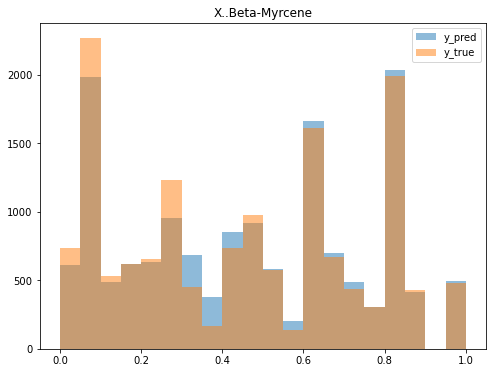

<Figure size 432x288 with 0 Axes>

In [49]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Beta-Myrcene"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_tfidf_bmyrc.png')

Pearson R

In [50]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.925
P-value: 0.000


<AxesSubplot:>

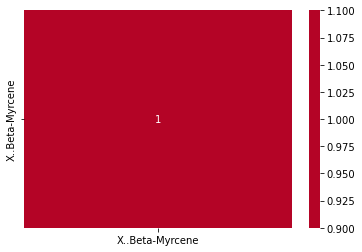

In [51]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)